In [1]:
using Plots
using QuadGK
using NLopt
#using SpecialFunctions
using NLsolve
using Statistics
include("../../scaling_CGS.jl")

print_basic_info (generic function with 1 method)

In [3]:
#---------- Double current sheet setup ----------
base = BaseUnits("CGS")

electron_proton_mass_ratio = 25.0

electron_mass_scaling = (base.m_p / base.m_e) / electron_proton_mass_ratio
charge_scaling = 1e0 #1e-5
eps_0_scaling = 1e2
mu_0_scaling = 1e0

scale_base_units(base, eps_0_scaling, mu_0_scaling, electron_mass_scaling, charge_scaling)


length = 1e0 #720.0847332647692
number_density= 1e9 #6.44179e10
B_flux= 50 #22.222
temperature   = 1e6
temperature_e = temperature
temperature_p = temperature



mu = ( (base.m_e + base.m_p)  / 2. ) /  base.m_u# assuming only protons and electrons
mass_density = number_density * 2 * mu * base.m_u
e_plasma = base.e * sqrt(4 * π * number_density / base.m_e)



#----------- These always sets the following code units --------------
#            rho=1, c=1, e_plasma=2pi
mass_density_scale = mass_density
time_scale         = 2 * pi / e_plasma
length_scale       = base.c * time_scale#
temperature_scale  = 1e0
#----------------------------------------------------------------------

length = length_scale


scaling = ScalingCGS(base,
                number_density, length, temperature, temperature_e, temperature_p, B_flux,
                length_scale, mass_density_scale, time_scale, temperature_scale)
ds = 4 / (32 * 32 )
per_cell = 32

set_macro_particle_weights(scaling, ds, per_cell);
print_all_CGS(scaling)



 Maxwell Lorents Factors used in code:
 k_E =                                             =  1.0000e+00 
 k_B =                                             =  1.0000e+00 
 k_F =                                             =  1.0000e+00 
 k_D =                                             =  1.0000e+00 
 k_M =                                             =  1.0000e+00 
 k_H =                                             =  1.0000e+00 

 Macro particle weights:
                          ds =                     =  3.9062e-03 
                    per_cell =                     =  3.2000e+01 
               weight_scaled =                     =  1.3801e+06 
 weight_scaled_mass_electron =                     =  7.1640e-11 
   weight_scaled_mass_proton =                     =  1.7910e-09 
        weight_scaled_charge =                     =  6.4747e-10 
                 rho_n_ratio =                     =  7.4094e+14 

 Fundamental physical constants:
        Gravitational Constant [ cm^3 g^-1

In [4]:
println("lenght                 = ", length)
println("number_density         = ", number_density)
println("B                      = ", B_flux)
println("T                      = ", temperature)
println("")
println("length_scale           = ", length_scale)
println("mass_density_scale     = ", mass_density_scale)
println("time_scale             = ", time_scale)
println("")
println("e_mass_scale           = ", electron_mass_scaling)
println("charge_scaling         = ", charge_scaling)
println("eps_0_scaling          = ", eps_0_scaling)
println("mu_0_scaling           = ", mu_0_scaling)

lenght                 = 904.8851631947058
number_density         = 1.0e9
B                      = 50
T                      = 1.0e6

length_scale           = 904.8851631947058
mass_density_scale     = 1.7395267739199998e-15
time_scale             = 3.0183720071927415e-8

e_mass_scale           = 73.4461069504027
charge_scaling         = 1.0
eps_0_scaling          = 1.0
mu_0_scaling           = 1.0


In [5]:
ds / scaling.debye_len_code 

16.197497624788433

In [6]:
ds / 2

0.001953125

In [7]:
32*32

1024

In [8]:
gamma = 5. / 3.
c_s = sqrt(gamma * scaling.k_B_real * scaling.temperature_real /  scaling.m_u_real) 


c_s_ideal = sqrt(gamma * scaling.pressure_real / scaling.mass_density_real)
v_a = scaling.v_a_real

c_ms = sqrt(v_a^2 + c_s^2)

theta = 1

omega_o_k = sqrt( 0.5 * (c_ms^2 + sqrt(c_ms^4 - 4 * v_a^2 * c_s^2 * cos(theta)) ))


println( " c_s       = " , c_s / scaling.c_real)
println( " c_s_ideal = " , c_s_ideal / scaling.c_real)
println( " v_a       = " , v_a / scaling.c_real)
println( " c_ms      = ", c_ms / scaling.c_real)
println( " omega_o_k = ", omega_o_k / scaling.c_real) 

println( " beta      = ",  2 *  c_s^2 / (gamma * v_a^2))

 c_s       = 0.0003926636407300777
 c_s_ideal = 0.0005425561326285347
 v_a       = 0.011279794313761757
 c_ms      = 0.011286626798805897
 omega_o_k = 0.011282937761947033
 beta      = 0.0014541870180489953


In [9]:
nu_ei = 4 / 3 * sqrt(  2 * pi * scaling.e_real^4 * scaling.number_density_real / (scaling.m_e_real^(1/2) * scaling.k_B_real * scaling.temperature_e_real^(3/2) ) )

0.00012902824073716932

In [10]:
2.91e-6 * scaling.number_density_real / (scaling.temperature_e_real^(3/2))

2.91e-6

In [11]:
e_int = 0.00125#4.41554f-5
rho = 1.
gamma = 1.4

T = e_int / rho * 1 / (scaling.rho_n_ratio * scaling.k_B_code ) * 1/ 2 * (gamma - 1.0)

2.8309317577292395e9

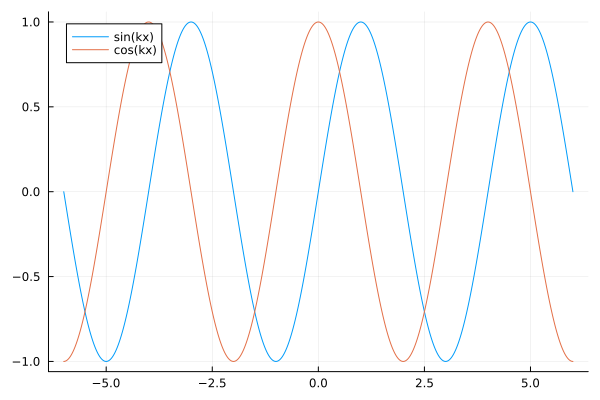

In [12]:
lambda = 4.0
k = 2. * pi / lambda




x = range(-6, stop=6, length=1000)

plot(x,sin.(k .* x), label="sin(kx)")
plot!(x,cos.(k .* x), label="cos(kx)")

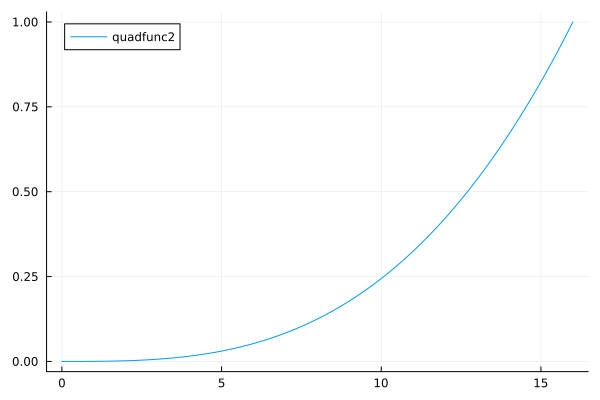

In [22]:
max_dist = 16


dist = range(0, stop=max_dist, length=1000)


#quadfunc = (1 .- dist ./ max_dist).^3 
#quadfunc = (1 .- dist ./ max_dist).^2 
#quadfunc2 = abs.((1 .- dist ./ max_dist).^2 .- 1).* 0.5 .+ 0.5

quadfunc2 = (dist ./ max_dist).^3 #(1 .- dist ./ max_dist).^2





#plot(dist, quadfunc, label="quadfunc")
plot(dist, quadfunc2, label="quadfunc2")

### Summary of Initial Conditions
- Background magnetic field:  
$$\mathbf{B}_0 = B_0 \hat{\mathbf{x}}$$
- Magnetic field perturbation: 
$$\delta B_y(x, 0) = \delta B_{y0} \sin(kx)$$
- Velocity perturbation: 
$$ v_y(x, 0) = \frac{\delta B_{y0}}{\sqrt{\mu_0 \rho}} \cos(kx) $$
$$ v_y(x, 0) = \frac{\delta B_{y0}}{\sqrt{\mu_0 \rho}} \cos(kx) = \frac{\delta B_{y0}}{v_A} \cos(kx) $$

In [14]:
4 / (17*16) / 2

0.007352941176470588

In [15]:
4 / (26*16) / 2

0.004807692307692308

In [16]:
7.6271806E-10 * 2

1.52543612e-9

In [34]:
base.c

2.9979245800000004e10

In [36]:
base.eps_0 / (4 * pi)

8.85418781762039e-23

In [35]:
mu_0 = 4 * pi 
c = base.c 



eps_0 = 1 / (c^2 * mu_0)



#1 / sqrt(eps_0 * mu_0)

8.854187817620387e-23

In [4]:
B_code

UndefVarError: UndefVarError: B_code not defined